# Práctica 1: Aprendizaje automático

__Fecha de entrega: 13 de marzo de 2022__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

## Apartado 3: Regresión

__Número de grupo: 15__

__Nombres de los estudiantes: Javier Sande Ríos y Mario Sanz Guerrero__

En este notebook trabajaremos con un conjunto de datos tomado del repositorio de la Universidad de California Irvine. En concreto, se trata de un conjunto de datos sobre distintos vinos del norte de Portugal (vinho verde)  que puedes encontrar [aquí](https://archive.ics.uci.edu/ml/datasets/wine+quality). 

El objetivo es modelar la calidad del vino (con un valor de 0 a 10) en base a variables que reflejan sus propiedades físicas y químicas. En concreto, las propiedades son las siguientes:
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol 

De cara a la memoria que vas a realizar puedes investigar sobre estas propiedades para explicar mejor qué miden y cómo afectan al vino. 

La calidad del vino es una variable que toma valores entre 0 y 10. 

Para modelar la relación entre la calidad del vino y sus propiedades usaremos una red neuronal. 

### 1) Descripción de los datos

Carga el fichero de datos `calidad_vinos.csv` en un dataframe. 

Describe el conjunto de datos e identifica aquella variable que tiene unos valores extremos más acusados con respecto a la media, y aquella que está más concentrada en torno a la media. Reflexiona sobre la posible influencia de estas variables a la hora de entrenar el perceptrón multicapa.

Estudia la distribución de la calidad del vino en el conjunto de datos.

**Solución:**

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('calidad_vinos.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


La variable que tiene unos valores extremos más acusados con respecto a la media será aquella con una desviación típica (std) más alta, ya que esto indica una mayor dispersión de los datos. En este caso esa variable es `total sulfur dioxide` con mucha diferencia.

De manera análoga pero al revés, la variable con valores más concentrados en torno a la media será la que tenga una desviación típica (std) más baja, que en este caso es la variable `density`, con incluso más diferencia sobre el resto que la anterior.

A la hora de entrenar un perceptrón multicapa, será un problema que las variables tengan una desviación típica tan dispar, siendo 32.89 la de `total sulfur dioxide` y 0.0018 la de `density`. El hecho de que haya una diferencia tan grande de desviaciones típicas va a dificultar mucho el encontrar una relación entre las variables. Por lo tanto, será una buena idea reescalar los datos de forma que dejamos los valores próximos a 0, reducimos sus desviaciones típicas, y ayudamos al perceptrón a converger mucho más rápido a una solución.

## Quality (3-8)

### 2) Selección de variables

Calcula los coeficientes de correlación de Pearson entre la variable de salida y el resto de variables. Crea un nuevo dataframe que contenga el precio y, selecciona las variables que estén más correlacionadas con él (estableciendo para ello un valor umbral que consideres adecuado).

**Solución:**

In [5]:
correlacion = df.corr(method='pearson')
df_corr = correlacion['quality']
df_corr

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [6]:
df_mayorCorr = correlacion[abs(df_corr) > 0.2]['quality']
df_mayorCorr

volatile acidity   -0.390558
citric acid         0.226373
sulphates           0.251397
alcohol             0.476166
quality             1.000000
Name: quality, dtype: float64

En este problema en concreto vemos que ninguna de las variables están fuertemente ligadas a la calidad del vino. Sí que vemos un pequeño despunte en las variables de `alcohol` y `volatile acidity`, pero para nada son decisivas en la calidad final ya que ambas están por debajo de 0.5.

Si analizamos un poco más de cerca estas dos variables vemos que el alcohol está relacionado de forma directamente proporcional con la calidad del vino. Analizando el dataset asumimos que el alcohol se mide en porcentaje sobre la bebida. Es decir, que a mayor graduación alcoholica, mayor calidad. Sin embargo, la acidez volátil está relacionada de forma inversamente proporcional a la calidad. Investigando un poco sobre el tema hemos visto que la acidez volátil aparece en vinos criados en barriles más viejos y deteriorados, porque es en estos en los que hay condiciones de menor esterilización y esto facilita la aparición de bacterias, por lo que tiene sentido que a mayor acidez volátil, menor sea la calidad.

Para realizar un estudio más detallado de cómo de buena será la calidad del vino basado en las variables, habría que estudiar detalladamente cómo se relacionan las variables entre sí para dar un resultado final de calidad determinado. Este va a ser el trabajo del perceptrón multicapa que, mediante entrenamiento, va a encontrar relaciones entre las variables que a nosotros nos costaría mucho tiempo y esfuerzo encontrar.

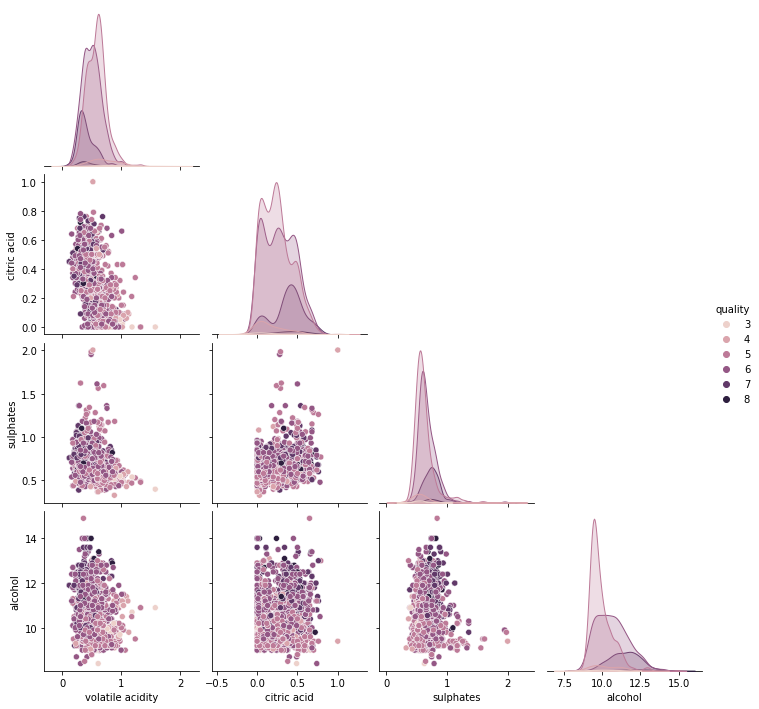

In [11]:
import seaborn 
import matplotlib.pyplot as plt 

seaborn.pairplot(df[df_mayorCorr.keys()], corner = True, hue ='quality')
plt.show()

### 3) Normalización

Decide si debes o no normalizar los datos de entrada y/o de salida. En caso afirmativo elige razonadamente entre escalarlos o estandarizarlos.


**Solución:**

Aunque el reescalado de los datos no es necesario trabajando con redes neuronales, sí que es recomendable para que pueda converjer a una solución más rápidamente. El estandarizar los datos, estos se quedan más cerca de 0, lo que facilita la comparación entre variables reduciendo sus desviaciones típicas. Además, hemos visto en el primer ejercicio que las desviaciones típicas variaban mucho en este dataset, así que es especialmente recomendable estandarizar los datos.

In [25]:
from sklearn.preprocessing import StandardScaler

df_entrada = df.drop(columns=['quality'])
df_salida = df['quality'].to_frame()

# Transformamos las variables de entrada
scaler_x = StandardScaler()
scaler_x.fit(df_entrada)
df_entrada_scaled=scaler_x.transform(df_entrada)

# Y también transformamos la variable de salida
scaler_y = StandardScaler()
scaler_y.fit(df_salida)
df_salida_scaled=scaler_y.transform(df_salida)

### 4) Entrenamiento y selección

Crea dos redes neuronales de tipo Perceptrón Multicapa:
- La primera con una capa oculta de 250 neuronas
- La segunda con varias capas ocultas entre las que debes distribuir 250 neuronas, como te parezca

Asegúrate de que no salen warnings durante el entrenamiento indicando que no se ha alcanzado la convergencia durante el entrenamiento (para arreglarlo basta con poner un número de max_iter suficientemente grande).

En la configuración del perceptrón debes usar validación cruzada y explorar varios valores para el parámetro `alpha` que controla el coeficiente de regularización L2.

Para elegir el valor adecuado de dicho coeficiente pinta la curva de aprendizaje para cada perceptrón. En la curva debes pintar una línea que represente el error medio de las distintas particiones de validación y un área sombreada que represente la desviación típica. 

Una vez tengas la curva de aprendizaje: 
  - Identifica las diferencias de comportamiento entre ambos perceptrones, razona o especula sobre por qué se dan. ¿Hay alguno que domine al otro? ¿Es el comportamiento de uno más volátil que el del otro?
  - Determina de manera razonada con qué perceptrón te quedas y el valor óptimo del parámetro de regularización.


**Solución:**

In [35]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np
RANDOM_STATE = 22

cv_scores1_mean=[]
cv_scores1_std=[]

cv_scores2_mean=[]
cv_scores2_std=[]

# Entrenar y validar distintas configuraciones
regul_param_range = 10.0 ** -np.arange(1, 7) # [0.1, 0.01, ..., 0.0000001]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp1=MLPRegressor(hidden_layer_sizes=(250, ), activation='relu', solver='adam', alpha=regul_param,
                      batch_size=100, learning_rate='constant', learning_rate_init=0.001, max_iter=500,
                      random_state=RANDOM_STATE)
    mlp2=MLPRegressor(hidden_layer_sizes=(100,100,50, ), activation='relu', solver='adam', alpha=regul_param,
                      batch_size=100, learning_rate='constant', learning_rate_init=0.001, max_iter=500,
                      random_state=RANDOM_STATE)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores1 = cross_val_score(mlp1, df_entrada_scaled, df_salida_scaled.ravel(), cv=5,
                              scoring='neg_mean_squared_error')
    scores2 = cross_val_score(mlp2, df_entrada_scaled, df_salida_scaled.ravel(), cv=5,
                              scoring='neg_mean_squared_error')
    
    cv_scores1_mean.append(scores1.mean())
    cv_scores1_std.append(scores1.std())
    
    cv_scores2_mean.append(scores2.mean())
    cv_scores2_std.append(scores2.std())

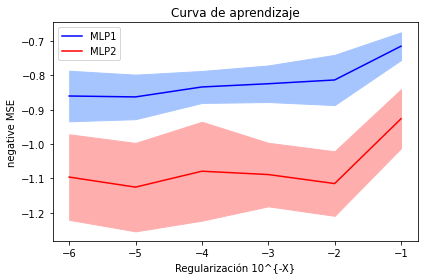

In [40]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores1_mean, color="b", label="MLP1")
plt.plot(np.log10(regul_param_range), cv_scores2_mean, color="r", label="MLP2")

# Dibujamos la banda de la desviación típica del MLP1
lower_limit = np.array(cv_scores1_mean) - np.array(cv_scores1_std)
upper_limit = np.array(cv_scores1_mean) + np.array(cv_scores1_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#A6C5FF")

# Dibujamos la banda de la desviación típica del MLP1
lower_limit = np.array(cv_scores2_mean) - np.array(cv_scores2_std)
upper_limit = np.array(cv_scores2_mean) + np.array(cv_scores2_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#FFAEAE")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

### 5) Medición y análisis del error

Elige la mejor configuración del apartado anterior y usa la función `cross_val_predict` para realizar una predicción de la calidad de todos los vinos usando validación cruzada. 

A continuación:
- Muestra varias medidas de error y razona sobre si el error te parece pequeño o no para el problema que estás analizando
- Muestra el histograma de la distribución del error o del error en valor absoluto, y razona de nuevo si te parece que el modelo ha predicho bien o no. Identifica los vinos para los cuales el modelo ha fallado más.
- Analiza el error cometido para los vinos según su puntuación de calidad observada (3, 4, etc). Describe lo que sucede, explica por qué crees que sucedió y razona de nuevo si te parece que el modelo funciona bien o tiene limitaciones. 